https://data.cityofnewyork.us/Environment/New-York-City-s-Flood-Vulnerability-Index/mrjc-v9pm/about_data

This maps two charts, one of which is all of the subway train rides and the second is a NYC Flood Vulnerability index. It aims to see the impact of potential floods on NYC subways. 

However, it only shows the subway stations as vulnerable and not the infrastructure between stops or the actual lines. 

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

from matplotlib.colors import ListedColormap, BoundaryNorm

import matplotlib.cm as cm

import matplotlib.colors as mcolors

import geopandas as gpd
import folium
import matplotlib.pyplot as plt

import branca


In [2]:
# Read the shapefile
df = pd.read_csv("New_York_City_s_Flood_Vulnerability_Index_20240930.csv")
# Read the shapefile
gdf = gpd.read_file("/Users/bricenfisher/Downloads/New York City's Flood Vulnerability Index_20240930/geo_export_d5f0fd6a-fb11-4302-8722-c77598d0deab.shp")


Clean DataFrames

In [3]:
gdf['ss_cur'] = gdf['ss_cur'].fillna(0)
gdf['ss_50s'] = gdf['ss_50s'].fillna(0)
gdf['ss_80s'] = gdf['ss_80s'].fillna(0)
gdf['tid_20s'] = gdf['tid_20s'].fillna(0)
gdf['tid_50s'] = gdf['tid_50s'].fillna(0)
gdf['tid_80s'] = gdf['tid_80s'].fillna(0)

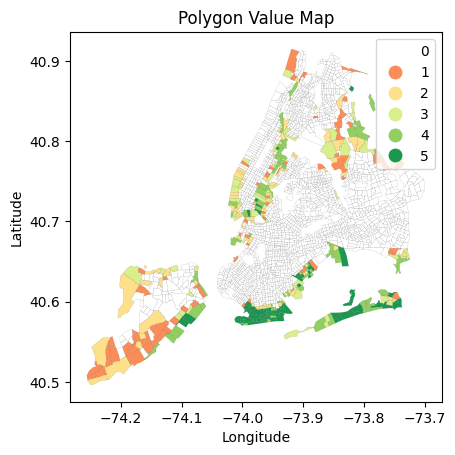

In [5]:
# Define your custom color list (6 colors)
colors = ['#ffffff', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']  # Customize these colors

# Create a custom colormap
cmap = ListedColormap(colors)

# Plot the polygons, colored by a specific column (replace 'value_column' with your actual column name)
gdf.plot(column='ss_cur', legend=True, cmap=cmap, edgecolor='black',linewidth= 0.05)

# Customize and show the plot
#plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), boundaries=bounds, ticks=bounds[:-1])
plt.title('Polygon Value Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [56]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles="CartoDB positron")
m

In [7]:
gdf

geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0     36081036300     5      0      0      0       0       0       0   
1     36047058000     5      0      0      2       0       0       0   
2     36047053200     5      0      0      0       0       0       0   
3     36005036300     5      0      0      0       0       0       0   
4     36081035700     5      1      1      1       0       0       0   
...           ...   ...    ...    ...    ...     ...     ...     ...   
2204  36061004700     1      3      3      3       0       0       0   
2205  36061025500     1      0      0      0       0       0       0   
2206  36061027700     1      0      0      0       0       0       0   
2207  36005009302   NaN      0      0      0       0       0       0   
2208  36005028400   NaN      2      1      1       0       0       0   

                                               geometry  
0     POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1     POLYGON ((-73.95776 40.60099, -73.95683 40.601...  
2     POLYGON ((-73.96230 40.62996, -73.96137 40.630...  
3     POLYGON ((-73.88545 40.84377, -73.88529 40.844...  
4     POLYGON ((-73.87639 40.76900, -73.87602 40.770...  
...                                                 ...  
2204  POLYGON ((-74.00479 40.72362, -74.00458 40.724...  
2205  POLYGON ((-73.95416 40.84799, -73.95283 40.851...  
2206  POLYGON ((-73.93008 40.85431, -73.92964 40.854...  
2207  POLYGON ((-73.90307 40.80988, -73.89917 40.812...  
2208  POLYGON ((-73.84494 40.84821, -73.84359 40.850...  

[2209 rows x 9 columns]

In [8]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles="CartoDB positron")
m

#https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html
# Define a function to assign colors based on values
def get_fill_color(value):
    if value == 0:
        return 'green'
    elif value == 1:
        return 'purple'
    elif value == 2:
        return 'orange'
    elif value == 3:
        return 'yellow'
    elif value == 4:
        return 'pink'
    elif value == 5:
        return 'black'
    else:
        return 'white'  # default color if value is out of range

for _, r in gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {
        #"fillColor": "orange",
        "fillColor": get_fill_color(r["ss_cur"]),
        'color':'blue',
        'weight':0.0000001
        })
    folium.Popup(r["geoid"]).add_to(geo_j)
    geo_j.add_to(m)

m



v2

In [9]:
import pandas as pd
from io import StringIO
import requests

In [10]:
def establish_nys_session():
    session = requests.Session()
    # Add headers or authentication if needed
    return session

In [11]:
url = """https://data.ny.gov/resource/wujg-7c2s.csv?$query=SELECT
    date_trunc_y(transit_timestamp) AS year,
    station_complex,
    round(SUM(ridership),0) AS total_ridership
WHERE
    station_complex = 'Vernon Blvd-Jackson Av (7)' AND
    (
        (transit_timestamp >= '2022-07-04T00:00:00' AND transit_timestamp <= '2022-07-04T23:59:59') OR
        (transit_timestamp >= '2023-07-04T00:00:00' AND transit_timestamp <= '2023-07-04T23:59:59')
    )
GROUP BY
    year, station_complex
ORDER BY
    year ASC
"""

url = """https://data.ny.gov/resource/wujg-7c2s.csv?$query=
SELECT 
    station_complex,
    Georeference,
    round(SUM(ridership),0) AS total_ridership
WHERE 
    transit_timestamp >= '2023-12-31T00:00:00' 
    AND 
    transit_timestamp <= '2024-01-01T00:00:00'
GROUP BY 
    station_complex, Georeference
ORDER BY 
    station_complex
"""

session = establish_nys_session()
response = session.get(url)


# Convert the CSV response to a DataFrame
data = StringIO(response.text)

print(data)

df = pd.read_csv(data, header=0)

df

station_complex                  Georeference  total_ridership
0                 103 St (1)  POINT (-73.968376 40.799446)             6150
1                 103 St (6)     POINT (-73.94748 40.7906)             3676
2               103 St (C,B)   POINT (-73.96146 40.796093)             2142
3    103 St-Corona Plaza (7)    POINT (-73.8627 40.749866)            10375
4                 104 St (A)   POINT (-73.837685 40.68171)              417
..                       ...                           ...              ...
478     Woodhaven Blvd (M,R)   POINT (-73.86923 40.733105)             6912
479             Woodlawn (4)   POINT (-73.87875 40.886036)             1624
480        WTC Cortlandt (1)   POINT (-74.01219 40.711834)            13680
481              York St (F)   POINT (-73.98675 40.701397)             8179
482            Zerega Av (6)   POINT (-73.84704 40.836487)              614

[483 rows x 3 columns]

In [12]:
print(gdf)

            geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0     36081036300     5      0      0      0       0       0       0   
1     36047058000     5      0      0      2       0       0       0   
2     36047053200     5      0      0      0       0       0       0   
3     36005036300     5      0      0      0       0       0       0   
4     36081035700     5      1      1      1       0       0       0   
...           ...   ...    ...    ...    ...     ...     ...     ...   
2204  36061004700     1      3      3      3       0       0       0   
2205  36061025500     1      0      0      0       0       0       0   
2206  36061027700     1      0      0      0       0       0       0   
2207  36005009302   NaN      0      0      0       0       0       0   
2208  36005028400   NaN      2      1      1       0       0       0   

                                               geometry  
0     POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1     POLYGON ((-73

In [13]:
df_polygons = gdf
df_points = df

In [14]:
df_points.columns = df_points.columns.str.strip()
df_polygons.columns = df_polygons.columns.str.strip()

gdf1 = gpd.GeoDataFrame(df_points, geometry=gpd.GeoSeries.from_wkt(df_points['Georeference']))
gdf2 = df_polygons

gdf1 is the subway stations
gdf2 is the polygons of the vulnerable areas

In [15]:
gdf1['Georeference'] = gdf1['Georeference'].apply(wkt.loads)  # Convert the Georeference points from WKT format
gdf1 = gpd.GeoDataFrame(gdf1, geometry='Georeference', crs="EPSG:4326")  # Assuming WGS84 for points


In [16]:
gdf2 = gdf2.set_crs("EPSG:4326", allow_override=True)


In [17]:
gdf1

station_complex                Georeference  total_ridership  \
0                 103 St (1)  POINT (-73.96838 40.79945)             6150   
1                 103 St (6)  POINT (-73.94748 40.79060)             3676   
2               103 St (C,B)  POINT (-73.96146 40.79609)             2142   
3    103 St-Corona Plaza (7)  POINT (-73.86270 40.74987)            10375   
4                 104 St (A)  POINT (-73.83768 40.68171)              417   
..                       ...                         ...              ...   
478     Woodhaven Blvd (M,R)  POINT (-73.86923 40.73311)             6912   
479             Woodlawn (4)  POINT (-73.87875 40.88604)             1624   
480        WTC Cortlandt (1)  POINT (-74.01219 40.71183)            13680   
481              York St (F)  POINT (-73.98675 40.70140)             8179   
482            Zerega Av (6)  POINT (-73.84704 40.83649)              614   

                       geometry  
0    POINT (-73.96838 40.79945)  
1    POINT (-73.94748 40.79060)  
2    POINT (-73.96146 40.79609)  
3    POINT (-73.86270 40.74987)  
4    POINT (-73.83768 40.68171)  
..                          ...  
478  POINT (-73.86923 40.73311)  
479  POINT (-73.87875 40.88604)  
480  POINT (-74.01219 40.71183)  
481  POINT (-73.98675 40.70140)  
482  POINT (-73.84704 40.83649)  

[483 rows x 4 columns]

In [18]:
gdf1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   station_complex  483 non-null    object  
 1   Georeference     483 non-null    geometry
 2   total_ridership  483 non-null    int64   
 3   geometry         483 non-null    geometry
dtypes: geometry(2), int64(1), object(1)
memory usage: 15.2+ KB


In [19]:
gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geoid     2209 non-null   object  
 1   fshri     2207 non-null   object  
 2   ss_cur    2209 non-null   object  
 3   ss_50s    2209 non-null   object  
 4   ss_80s    2209 non-null   object  
 5   tid_20s   2209 non-null   object  
 6   tid_50s   2209 non-null   object  
 7   tid_80s   2209 non-null   object  
 8   geometry  2209 non-null   geometry
dtypes: geometry(1), object(8)
memory usage: 155.4+ KB


https://medium.com/analytics-vidhya/point-in-polygon-analysis-using-python-geopandas-27ea67888bff

In [20]:
def get_pip (gdf, regions):
    r_list = list(regions.geoid)
    #create empty dataframe
    df = pd.DataFrame().reindex_like(gdf).dropna()
    for r in r_list:
        #get geometry for specific region
        pol = (regions.loc[regions.geoid==r])
        pol.reset_index(drop = True, inplace = True)
        #identify those records from gdf that are intersecting with the region polygon
        pip_mask = gdf.within(pol.loc[0, 'geometry'])
        #filter gdf to keep only the intersecting records
        pip_data = gdf.loc[pip_mask].copy()
        #create a new column and assign the region geoid as the value
        pip_data['region']= r
        #append region data to empty dataframe
        df = pd.concat([df,pip_data])
    #checking there are no more than one region assigned to an event    
    print('Original dataframe count=',len(gdf),'\nNew dataframe count=', len(df))
    
    df.reset_index(inplace=True, drop=True)
    df = df.drop(columns='geometry')
    return df

eq_df = get_pip(gdf1, gdf2)


/var/folders/wm/w3d80c152lq65mt41y20p1200000gn/T/ipykernel_57671/2633077353.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,pip_data])


Original dataframe count= 483 
New dataframe count= 465


In [21]:
print(eq_df)

              station_complex                Georeference  total_ridership  \
0                Avenue U (Q)  POINT (-73.95593 40.59930)           2757.0   
1                Avenue H (Q)  POINT (-73.96164 40.62927)            920.0   
2                Avenue J (Q)  POINT (-73.96080 40.62504)           1899.0   
3                Elder Av (6)  POINT (-73.87916 40.82858)           2042.0   
4       82 St-Jackson Hts (7)  POINT (-73.88370 40.74766)           3301.0   
..                        ...                         ...              ...   
460                7 Av (F,G)  POINT (-73.98031 40.66627)           4697.0   
461            8 St-NYU (R,W)  POINT (-73.99263 40.73033)           7463.0   
462              Astor Pl (6)  POINT (-73.99107 40.73005)           7718.0   
463  Canal St (J,N,Q,R,W,Z,6)  POINT (-74.00178 40.71953)             70.0   
464                191 St (1)  POINT (-73.92941 40.85522)           2790.0   

          region  
0    36047058000  
1    36047053200  
2    3

In [22]:
eq_df.region.value_counts().max()


6

In [23]:
summed_ridership = eq_df.groupby('region')['total_ridership'].sum()
summed_ridership

region
36005002300    2238.0
36005002702     601.0
36005003100     202.0
36005003900    1741.0
36005004800    1715.0
                ...  
36081099801     438.0
36081100803    1402.0
36081107201      62.0
36085000300    1940.0
36085002100     203.0
Name: total_ridership, Length: 379, dtype: float64

In [24]:
gdf3 = gpd.GeoDataFrame(gdf2)
gdf3

geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0     36081036300     5      0      0      0       0       0       0   
1     36047058000     5      0      0      2       0       0       0   
2     36047053200     5      0      0      0       0       0       0   
3     36005036300     5      0      0      0       0       0       0   
4     36081035700     5      1      1      1       0       0       0   
...           ...   ...    ...    ...    ...     ...     ...     ...   
2204  36061004700     1      3      3      3       0       0       0   
2205  36061025500     1      0      0      0       0       0       0   
2206  36061027700     1      0      0      0       0       0       0   
2207  36005009302   NaN      0      0      0       0       0       0   
2208  36005028400   NaN      2      1      1       0       0       0   

                                               geometry  
0     POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1     POLYGON ((-73.95776 40.60099, -73.95683 40.601...  
2     POLYGON ((-73.96230 40.62996, -73.96137 40.630...  
3     POLYGON ((-73.88545 40.84377, -73.88529 40.844...  
4     POLYGON ((-73.87639 40.76900, -73.87602 40.770...  
...                                                 ...  
2204  POLYGON ((-74.00479 40.72362, -74.00458 40.724...  
2205  POLYGON ((-73.95416 40.84799, -73.95283 40.851...  
2206  POLYGON ((-73.93008 40.85431, -73.92964 40.854...  
2207  POLYGON ((-73.90307 40.80988, -73.89917 40.812...  
2208  POLYGON ((-73.84494 40.84821, -73.84359 40.850...  

[2209 rows x 9 columns]

In [25]:
summed_ridership

summed_ridership = summed_ridership.reset_index()
summed_ridership.columns = ['geoid', 'total_ridership']
summed_ridership


geoid  total_ridership
0    36005002300           2238.0
1    36005002702            601.0
2    36005003100            202.0
3    36005003900           1741.0
4    36005004800           1715.0
..           ...              ...
374  36081099801            438.0
375  36081100803           1402.0
376  36081107201             62.0
377  36085000300           1940.0
378  36085002100            203.0

[379 rows x 2 columns]

In [26]:
gdf3 = gdf2

In [27]:
gdf3.head(2)

geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0  36081036300     5      0      0      0       0       0       0   
1  36047058000     5      0      0      2       0       0       0   

                                            geometry  
0  POLYGON ((-73.87135 40.76233, -73.86826 40.761...  
1  POLYGON ((-73.95776 40.60099, -73.95683 40.601...

In [28]:
summed_ridership.head(2)

geoid  total_ridership
0  36005002300           2238.0
1  36005002702            601.0

In [29]:
gdf_with_ridership = gdf3.merge(summed_ridership, on = "geoid")
gdf_with_ridership

geoid fshri ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0    36047058000     5      0      0      2       0       0       0   
1    36047053200     5      0      0      0       0       0       0   
2    36005005400     5      1      1      2       2       2       1   
3    36081028300     5      0      0      0       0       0       0   
4    36005008300     5      0      0      0       0       0       0   
..           ...   ...    ...    ...    ...     ...     ...     ...   
374  36061017200     1      3      4      4       0       0       0   
375  36047015100     1      0      0      0       0       0       0   
376  36061005700     1      0      0      0       0       0       0   
377  36061004700     1      3      3      3       0       0       0   
378  36061027700     1      0      0      0       0       0       0   

                                              geometry  total_ridership  
0    POLYGON ((-73.95776 40.60099, -73.95683 40.601...           2757.0  
1    POLYGON ((-73.96230 40.62996, -73.96137 40.630...           2819.0  
2    POLYGON ((-73.88389 40.82981, -73.88235 40.831...           2042.0  
3    POLYGON ((-73.88654 40.75159, -73.88561 40.751...           3301.0  
4    POLYGON ((-73.90418 40.81309, -73.90380 40.814...           1323.0  
..                                                 ...              ...  
374  POLYGON ((-73.94790 40.79293, -73.94695 40.794...           3095.0  
375  POLYGON ((-73.98544 40.66623, -73.98494 40.666...           4697.0  
376  POLYGON ((-73.99455 40.72941, -73.99406 40.729...          15181.0  
377  POLYGON ((-74.00479 40.72362, -74.00458 40.724...             70.0  
378  POLYGON ((-73.93008 40.85431, -73.92964 40.854...           2790.0  

[379 rows x 10 columns]

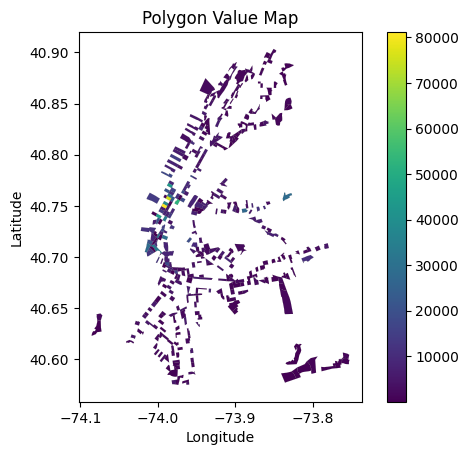

In [30]:
# Plot the polygons, colored by a specific column (replace 'value_column' with your actual column name)
gdf_with_ridership.plot(column='total_ridership', legend=True, edgecolor='black',linewidth= 0.05)

# Customize and show the plot
#plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), boundaries=bounds, ticks=bounds[:-1])
plt.title('Polygon Value Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Group my vulnerability zone

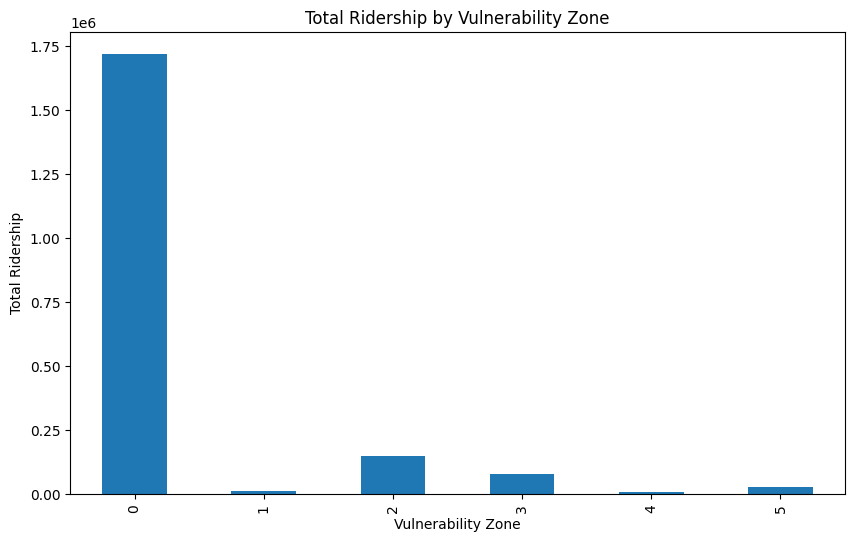

In [31]:
df_by_vulnerability_zone = gdf_with_ridership.groupby("ss_cur")["total_ridership"].sum()
# Create the figure and axes objects, specify the size and the dots per inches 


df_by_vulnerability_zone.plot(kind='bar', figsize=(10,6))

# Add labels and title
plt.xlabel("Vulnerability Zone")
plt.ylabel("Total Ridership")
plt.title("Total Ridership by Vulnerability Zone")

# Show the plot
plt.show()

Let's look into some of the stations

In [32]:
print(gdf_with_ridership.groupby("ss_cur")["total_ridership"].count())


ss_cur
0    324
1      5
2     17
3     13
4      6
5     14
Name: total_ridership, dtype: int64


There are 14 stations in zone 5 vulnerability

In [33]:
gdf_with_ridership_filtered = gdf_with_ridership

gdf_with_ridership_filtered['ss_cur'] = pd.to_numeric(gdf_with_ridership_filtered['ss_cur'], errors='coerce')


gdf_with_ridership_filtered = gdf_with_ridership_filtered[gdf_with_ridership_filtered['ss_cur'] == 5]
gdf_with_ridership_filtered

geoid fshri  ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
10   36047036002     5       5      5      5       0       0       0   
11   36047030800     5       5      5      5       0       0       0   
12   36047030600     5       5      5      5       0       0       0   
19   36061000600     5       5      4      4       0       4       4   
45   36047060600     5       5      5      5       0       0       3   
54   36047036200     5       5      5      5       0       0       4   
55   36081099200     5       5      5      5       0       5       5   
114  36081094202     4       5      5      5       2       2       5   
136  36081094201     3       5      5      5       0       0       4   
179  36047035400     3       5      5      5       0       0       5   
184  36081093800     3       5      5      4       0       0       5   
228  36047035000     2       5      4      4       0       0       5   
238  36081107201     2       5      5      4       5       5       5   
239  36081088400     2       5      5      4       4       5       5   

                                              geometry  total_ridership  
10   POLYGON ((-73.96328 40.57721, -73.96236 40.577...           3976.0  
11   POLYGON ((-73.98742 40.58513, -73.98539 40.587...            620.0  
12   POLYGON ((-73.98799 40.59255, -73.98602 40.594...            849.0  
19   POLYGON ((-73.99256 40.71439, -73.99075 40.714...           8202.0  
45   POLYGON ((-73.96035 40.58731, -73.95935 40.587...           3397.0  
54   POLYGON ((-73.96807 40.57831, -73.96582 40.578...           1105.0  
55   POLYGON ((-73.77387 40.59577, -73.77066 40.596...            228.0  
114  POLYGON ((-73.81983 40.59190, -73.81028 40.595...            185.0  
136  POLYGON ((-73.82733 40.58780, -73.81983 40.591...            129.0  
179  POLYGON ((-73.97655 40.57599, -73.97627 40.579...           1233.0  
184  POLYGON ((-73.84070 40.58609, -73.83351 40.586...            287.0  
228  POLYGON ((-73.98198 40.57925, -73.97961 40.579...           5386.0  
238  POLYGON ((-73.83420 40.59666, -73.82948 40.598...             62.0  
239  POLYGON ((-73.84243 40.66878, -73.84042 40.668...           1681.0

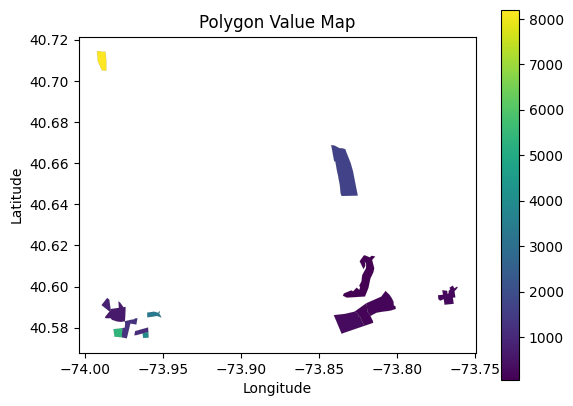

In [34]:
# Plot the polygons, colored by a specific column (replace 'value_column' with your actual column name)
gdf_with_ridership_filtered.plot(column='total_ridership', legend=True, edgecolor='black',linewidth= 0.05)

# Customize and show the plot
#plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca(), boundaries=bounds, ticks=bounds[:-1])
plt.title('Polygon Value Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [55]:
# Convert your GeoDataFrame to GeoJSON format
geo_json_data = gdf_with_ridership_filtered.to_crs(epsg=4326).to_json()

# Create a folium map centered around NYC
m = folium.Map(location=[40.643315421898, -73.95109946110213], zoom_start=10.5, tiles = 'Cartodb Positron')

# Add polygons to the map
folium.GeoJson(geo_json_data, name="Polygons").add_to(m)
m


In [36]:
gdf_with_ridership_filtered_testing = gdf_with_ridership_filtered

In [54]:
gdf_with_ridership_filtered_testing = gdf_with_ridership_filtered
# Sample GeoDataFrame with associated values
# Ensure the GeoDataFrame is in EPSG:4326 (lat/lon projection) for folium
gdf_with_ridership_filtered_testing = gdf_with_ridership_filtered_testing.to_crs(epsg=4326)

# Define a colormap based on the 'total_ridership' values
min_value = gdf_with_ridership_filtered_testing['total_ridership'].min()
max_value = gdf_with_ridership_filtered_testing['total_ridership'].max()

# Create a color map (e.g., Viridis colormap)

colors = ['#f7fcf0', '#e0f3db', '#ccece6', '#99d8c9', '#66c2a4', '#41ae76', '#238b45', '#006d2c']
colormap = branca.colormap.StepColormap(colors, vmin=min_value, vmax=max_value, index=[min_value + (max_value - min_value) * i / (len(colors) - 1) for i in range(len(colors))])
colormap.caption = 'Total Ridership'  # Add a caption for the color legend

# Create the folium map centered on NYC
m = folium.Map(location=[40.643315421898, -73.95109946110213], zoom_start=11.4,tiles = 'Cartodb Positron')

# Function to style the GeoJson based on the 'total_ridership' value
def style_function(feature):
    ridership_value = feature['properties']['total_ridership']
    return {
        'fillColor': colormap(ridership_value),
        'color': 'black',  # Polygon border color
        'weight': 1,  # Border thickness
        'fillOpacity': 0.7,  # Transparency of the fill color
    }

# Add the polygons to the map with the style function
folium.GeoJson(
    gdf_with_ridership_filtered_testing, 
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['ss_cur', 'total_ridership','geoid'], aliases=['Zone:', 'Ridership:','Location:'])
).add_to(m)

# Add the color map (legend) to the map
colormap.add_to(m)
m

In [38]:
gdf_with_ridership_filtered_testing

geoid fshri  ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
10   36047036002     5       5      5      5       0       0       0   
11   36047030800     5       5      5      5       0       0       0   
12   36047030600     5       5      5      5       0       0       0   
19   36061000600     5       5      4      4       0       4       4   
45   36047060600     5       5      5      5       0       0       3   
54   36047036200     5       5      5      5       0       0       4   
55   36081099200     5       5      5      5       0       5       5   
114  36081094202     4       5      5      5       2       2       5   
136  36081094201     3       5      5      5       0       0       4   
179  36047035400     3       5      5      5       0       0       5   
184  36081093800     3       5      5      4       0       0       5   
228  36047035000     2       5      4      4       0       0       5   
238  36081107201     2       5      5      4       5       5       5   
239  36081088400     2       5      5      4       4       5       5   

                                              geometry  total_ridership  
10   POLYGON ((-73.96328 40.57721, -73.96236 40.577...           3976.0  
11   POLYGON ((-73.98742 40.58513, -73.98539 40.587...            620.0  
12   POLYGON ((-73.98799 40.59255, -73.98602 40.594...            849.0  
19   POLYGON ((-73.99256 40.71439, -73.99075 40.714...           8202.0  
45   POLYGON ((-73.96035 40.58731, -73.95935 40.587...           3397.0  
54   POLYGON ((-73.96807 40.57831, -73.96582 40.578...           1105.0  
55   POLYGON ((-73.77387 40.59577, -73.77066 40.596...            228.0  
114  POLYGON ((-73.81983 40.59190, -73.81028 40.595...            185.0  
136  POLYGON ((-73.82733 40.58780, -73.81983 40.591...            129.0  
179  POLYGON ((-73.97655 40.57599, -73.97627 40.579...           1233.0  
184  POLYGON ((-73.84070 40.58609, -73.83351 40.586...            287.0  
228  POLYGON ((-73.98198 40.57925, -73.97961 40.579...           5386.0  
238  POLYGON ((-73.83420 40.59666, -73.82948 40.598...             62.0  
239  POLYGON ((-73.84243 40.66878, -73.84042 40.668...           1681.0

In [39]:
eq_df

station_complex                Georeference  total_ridership  \
0                Avenue U (Q)  POINT (-73.95593 40.59930)           2757.0   
1                Avenue H (Q)  POINT (-73.96164 40.62927)            920.0   
2                Avenue J (Q)  POINT (-73.96080 40.62504)           1899.0   
3                Elder Av (6)  POINT (-73.87916 40.82858)           2042.0   
4       82 St-Jackson Hts (7)  POINT (-73.88370 40.74766)           3301.0   
..                        ...                         ...              ...   
460                7 Av (F,G)  POINT (-73.98031 40.66627)           4697.0   
461            8 St-NYU (R,W)  POINT (-73.99263 40.73033)           7463.0   
462              Astor Pl (6)  POINT (-73.99107 40.73005)           7718.0   
463  Canal St (J,N,Q,R,W,Z,6)  POINT (-74.00178 40.71953)             70.0   
464                191 St (1)  POINT (-73.92941 40.85522)           2790.0   

          region  
0    36047058000  
1    36047053200  
2    36047053200  
3    36005005400  
4    36081028300  
..           ...  
460  36047015100  
461  36061005700  
462  36061005700  
463  36061004700  
464  36061027700  

[465 rows x 4 columns]

In [40]:
eq_df_merge = eq_df[['station_complex','region']]

In [41]:
gdf_with_ridership_filtered_testing_merged = gdf_with_ridership_filtered_testing





gdf_with_ridership_filtered_testing_merged = pd.merge(gdf_with_ridership_filtered_testing_merged, eq_df_merge, left_on='geoid', right_on='region', how='inner')
gdf_with_ridership_filtered_testing_merged

geoid fshri  ss_cur ss_50s ss_80s tid_20s tid_50s tid_80s  \
0   36047036002     5       5      5      5       0       0       0   
1   36047030800     5       5      5      5       0       0       0   
2   36047030600     5       5      5      5       0       0       0   
3   36061000600     5       5      4      4       0       4       4   
4   36047060600     5       5      5      5       0       0       3   
5   36047036200     5       5      5      5       0       0       4   
6   36081099200     5       5      5      5       0       5       5   
7   36081094202     4       5      5      5       2       2       5   
8   36081094201     3       5      5      5       0       0       4   
9   36047035400     3       5      5      5       0       0       5   
10  36047035400     3       5      5      5       0       0       5   
11  36081093800     3       5      5      4       0       0       5   
12  36081093800     3       5      5      4       0       0       5   
13  36047035000     2       5      4      4       0       0       5   
14  36081107201     2       5      5      4       5       5       5   
15  36081088400     2       5      5      4       4       5       5   

                                             geometry  total_ridership  \
0   POLYGON ((-73.96328 40.57721, -73.96236 40.577...           3976.0   
1   POLYGON ((-73.98742 40.58513, -73.98539 40.587...            620.0   
2   POLYGON ((-73.98799 40.59255, -73.98602 40.594...            849.0   
3   POLYGON ((-73.99256 40.71439, -73.99075 40.714...           8202.0   
4   POLYGON ((-73.96035 40.58731, -73.95935 40.587...           3397.0   
5   POLYGON ((-73.96807 40.57831, -73.96582 40.578...           1105.0   
6   POLYGON ((-73.77387 40.59577, -73.77066 40.596...            228.0   
7   POLYGON ((-73.81983 40.59190, -73.81028 40.595...            185.0   
8   POLYGON ((-73.82733 40.58780, -73.81983 40.591...            129.0   
9   POLYGON ((-73.97655 40.57599, -73.97627 40.579...           1233.0   
10  POLYGON ((-73.97655 40.57599, -73.97627 40.579...           1233.0   
11  POLYGON ((-73.84070 40.58609, -73.83351 40.586...            287.0   
12  POLYGON ((-73.84070 40.58609, -73.83351 40.586...            287.0   
13  POLYGON ((-73.98198 40.57925, -73.97961 40.579...           5386.0   
14  POLYGON ((-73.83420 40.59666, -73.82948 40.598...             62.0   
15  POLYGON ((-73.84243 40.66878, -73.84042 40.668...           1681.0   

                        station_complex       region  
0                  Brighton Beach (B,Q)  36047036002  
1                          Avenue X (F)  36047030800  
2                         Bay 50 St (D)  36047030600  
3                     East Broadway (F)  36061000600  
4                  Sheepshead Bay (B,Q)  36047060600  
5                        Ocean Pkwy (Q)  36047036200  
6                       Beach 36 St (A)  36081099200  
7                     Beach 90 St (A,S)  36081094202  
8                     Beach 98 St (A,S)  36081094201  
9                        Neptune Av (F)  36047035400  
10             W 8 St-NY Aquarium (F,Q)  36047035400  
11                   Beach 105 St (A,S)  36081093800  
12     Rockaway Park-Beach 116 St (A,S)  36081093800  
13  Coney Island-Stillwell Av (D,F,N,Q)  36047035000  
14                  Broad Channel (A,S)  36081107201  
15         Howard Beach-JFK Airport (A)  36081088400

In [46]:
gdf_with_ridership_filtered_testing = gdf_with_ridership_filtered_testing_merged
# Sample GeoDataFrame with associated values
# Ensure the GeoDataFrame is in EPSG:4326 (lat/lon projection) for folium
gdf_with_ridership_filtered_testing = gdf_with_ridership_filtered_testing.to_crs(epsg=4326)

# Define a colormap based on the 'total_ridership' values
min_value = gdf_with_ridership_filtered_testing['total_ridership'].min()
max_value = gdf_with_ridership_filtered_testing['total_ridership'].max()

# Create a color map (e.g., Viridis colormap)

colors = ['#f7fcf0', '#e0f3db', '#ccece6', '#99d8c9', '#66c2a4', '#41ae76', '#238b45', '#006d2c']
colormap = branca.colormap.StepColormap(colors, vmin=min_value, vmax=max_value, index=[min_value + (max_value - min_value) * i / (len(colors) - 1) for i in range(len(colors))])
colormap.caption = 'Total Ridership'  # Add a caption for the color legend

# Create the folium map centered on NYC
m = folium.Map(location=[40.643315421898, -73.95109946110213], zoom_start=11.4,tiles = 'Cartodb Positron')

# Function to style the GeoJson based on the 'total_ridership' value
def style_function(feature):
    ridership_value = feature['properties']['total_ridership']
    return {
        'fillColor': colormap(ridership_value),
        'color': 'black',  # Polygon border color
        'weight': 1,  # Border thickness
        'fillOpacity': 0.7,  # Transparency of the fill color
    }

# Add the polygons to the map with the style function
folium.GeoJson(
    gdf_with_ridership_filtered_testing, 
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['ss_cur', 'total_ridership','station_complex'], aliases=['Zone:', 'Ridership:','Location:'])
).add_to(m)

# Add the color map (legend) to the map
colormap.add_to(m)
m

In [52]:
gdf_with_ridership_v5 = gdf_with_ridership

gdf_with_ridership_v5['ss_cur'] = pd.to_numeric(gdf_with_ridership_v5['ss_cur'], errors='coerce')
gdf_with_ridership_v5['ss_50s'] = pd.to_numeric(gdf_with_ridership_v5['ss_50s'], errors='coerce')
gdf_with_ridership_v5['ss_80s'] = pd.to_numeric(gdf_with_ridership_v5['ss_80s'], errors='coerce')
gdf_with_ridership_v5['tid_20s'] = pd.to_numeric(gdf_with_ridership_v5['tid_20s'], errors='coerce')
gdf_with_ridership_v5['tid_50s'] = pd.to_numeric(gdf_with_ridership_v5['tid_50s'], errors='coerce')
gdf_with_ridership_v5['tid_80s'] = pd.to_numeric(gdf_with_ridership_v5['tid_80s'], errors='coerce')
gdf_with_ridership_v5

geoid fshri  ss_cur  ss_50s  ss_80s  tid_20s  tid_50s  tid_80s  \
0    36047058000     5       0       0       2        0        0        0   
1    36047053200     5       0       0       0        0        0        0   
2    36005005400     5       1       1       2        2        2        1   
3    36081028300     5       0       0       0        0        0        0   
4    36005008300     5       0       0       0        0        0        0   
..           ...   ...     ...     ...     ...      ...      ...      ...   
374  36061017200     1       3       4       4        0        0        0   
375  36047015100     1       0       0       0        0        0        0   
376  36061005700     1       0       0       0        0        0        0   
377  36061004700     1       3       3       3        0        0        0   
378  36061027700     1       0       0       0        0        0        0   

                                              geometry  total_ridership  
0    POLYGON ((-73.95776 40.60099, -73.95683 40.601...           2757.0  
1    POLYGON ((-73.96230 40.62996, -73.96137 40.630...           2819.0  
2    POLYGON ((-73.88389 40.82981, -73.88235 40.831...           2042.0  
3    POLYGON ((-73.88654 40.75159, -73.88561 40.751...           3301.0  
4    POLYGON ((-73.90418 40.81309, -73.90380 40.814...           1323.0  
..                                                 ...              ...  
374  POLYGON ((-73.94790 40.79293, -73.94695 40.794...           3095.0  
375  POLYGON ((-73.98544 40.66623, -73.98494 40.666...           4697.0  
376  POLYGON ((-73.99455 40.72941, -73.99406 40.729...          15181.0  
377  POLYGON ((-74.00479 40.72362, -74.00458 40.724...             70.0  
378  POLYGON ((-73.93008 40.85431, -73.92964 40.854...           2790.0  

[379 rows x 10 columns]

In [50]:
Testing_Variable = 'ss_cur'

gdf_with_ridership_filtered_testing = gdf_with_ridership_filtered_testing_merged

gdf_with_ridership_filtered_testing = gdf_with_ridership_filtered_testing.to_crs(epsg=4326)

min_value = gdf_with_ridership_filtered_testing[Testing_Variable].min()
max_value = gdf_with_ridership_filtered_testing[Testing_Variable].max()


colors = ['#f7fcf0', '#e0f3db', '#ccece6', '#99d8c9', '#66c2a4', '#41ae76', '#238b45', '#006d2c']
colormap = branca.colormap.StepColormap(colors, vmin=min_value, vmax=max_value, index=[min_value + (max_value - min_value) * i / (len(colors) - 1) for i in range(len(colors))])
colormap.caption = Testing_Variable  # Add a caption for the color legend

m = folium.Map(location=[40.643315421898, -73.95109946110213], zoom_start=11.4,tiles = 'Cartodb Positron')

def style_function(feature):
    ridership_value = feature['properties'][Testing_Variable]
    return {
        'fillColor': colormap(ridership_value),
        'color': 'black',  # Polygon border color
        'weight': 1,  # Border thickness
        'fillOpacity': 0.7,  # Transparency of the fill color
    }

folium.GeoJson(
    gdf_with_ridership_filtered_testing, 
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=['ss_cur', Testing_Variable,'station_complex'], aliases=['Zone:', 'Value:','Location:'])
).add_to(m)

colormap.add_to(m)
m

In [45]:
fig = branca.element.Figure()



subplot1 = fig.add_subplot(3, 2, 1)
subplot2 = fig.add_subplot(3, 2, 2)
subplot3 = fig.add_subplot(3, 2, 3)
subplot4 = fig.add_subplot(3, 2, 4)
subplot5 = fig.add_subplot(3, 2, 5)
subplot6 = fig.add_subplot(3, 2, 6)

subplot1.add_child(
    folium.Map([0, 0], zoom_start=1)
)
subplot2.add_child(
    folium.Map([46, 3], tiles="OpenStreetMap", zoom_start=5)
)
subplot3.add_child(
    folium.Map([46, 3], tiles="OpenStreetMap", zoom_start=5)
)
subplot4.add_child(
    folium.Map([46, 3], tiles="OpenStreetMap", zoom_start=5)
)
subplot5.add_child(
    folium.Map([46, 3], tiles="OpenStreetMap", zoom_start=5)
)
subplot6.add_child(
    folium.Map([46, 3], tiles="OpenStreetMap", zoom_start=5)
)
fig